## Step 1: Load Data
We start by downloading and loading the dataset `data_ffnn.txt`. The file consists of three columns: `x1`, `x2`, and `y`. This is a multi-class problem.


In [2]:
import pandas as pd

# Load the data
file_path = "data_ffnn.txt"  # Ensure this file is in your working directory
data = pd.read_csv(file_path, delim_whitespace=True, header=0, names=['x1', 'x2', 'y'])

# Display the first few rows
print(data.head())


         x1        x2  y
0  0.015546  0.807941  3
1  0.004527  1.426791  3
2  1.358103  1.193950  3
3  1.372911  0.218337  3
4  0.236595  0.281448  3


## Step 2: Plot the Data
Visualize the data in 2D, coloring each point according to its class.


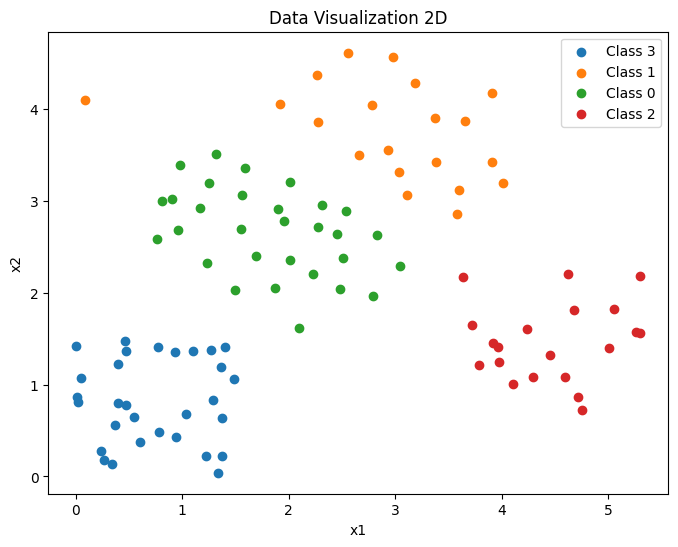

In [3]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(8, 6))
for label in data['y'].unique():
    subset = data[data['y'] == label]
    plt.scatter(subset['x1'], subset['x2'], label=f'Class {label}')
    
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data Visualization 2D')
plt.legend()
plt.show()


## Step 3: Forward Propagation
We implement forward propagation for a feedforward neural network with three layers. The hidden layer will have `K` neurons.


In [5]:
import numpy as np

# Define the learning rates
alpha_1, alpha_2 = 10**-3, 10**-3

# Define the number of iterations
iterations = 0



# Define the number of neurons in each layer
N = 2  
K = 4  
J = len(data['y'].unique())

# Initialize weights and biases
V = np.random.randn(N + 1, K)
W = np.random.randn(K + 1, J)

# Define a threshold
threshold = 10**-2

# Prepare input data
X = data[['x1', 'x2']].values
X_bar = np.hstack((np.ones((data.shape[0], 1)), data[['x1', 'x2']].values))


# forward propagation

# Hidden layer
X_bar_bar = np.dot(X_bar, V)
F = 1 / (1 + np.exp(-X_bar_bar))  # sigmoid activation
F_bar = np.hstack((np.ones((F.shape[0], 1)), F))  
F_bar_bar = np.dot(F_bar, W)

# Output layer
G = 1 / (1 + np.exp(-F_bar_bar))  # Sigmoid activation

# calculate the error (SSE)
y_one_hot = np.eye(J)[data['y'].astype(int)]
E = 0.5 * np.sum((G - y_one_hot) ** 2)

# Display results
print("X:", X)
print("X_bar:", X_bar)
print("X_bar_bar:", X_bar_bar)
print("V:", V)
print("F:", F)
print("F_bar:", F_bar)
print("F_bar_bar:", F_bar_bar)
print("W:", W)
print("G:", G)
print("E (Error):", E)


X: [[1.55463920e-02 8.07940924e-01]
 [4.52693500e-03 1.42679068e+00]
 [1.35810305e+00 1.19395041e+00]
 [1.37291148e+00 2.18337347e-01]
 [2.36595105e-01 2.81447509e-01]
 [9.33743853e-01 1.35871424e+00]
 [1.48493277e+00 1.06668369e+00]
 [1.09770061e+00 1.36393981e+00]
 [6.01310599e-01 3.74776020e-01]
 [2.60145256e-01 1.79185576e-01]
 [1.21891588e+00 2.20188560e-01]
 [3.96446224e-01 1.22863377e+00]
 [4.65880878e-01 1.47362617e+00]
 [3.99958053e-01 8.00480017e-01]
 [4.71700517e-01 1.36615925e+00]
 [5.49834966e-01 6.50388491e-01]
 [7.68439038e-01 1.40832972e+00]
 [4.64235090e-02 1.07531800e+00]
 [1.33652843e+00 4.09308350e-02]
 [7.83076871e-01 4.88984718e-01]
 [1.28923398e+00 8.37774826e-01]
 [1.03534180e+00 6.79280250e-01]
 [9.42463556e-01 4.35145278e-01]
 [1.40228670e-02 8.65133902e-01]
 [4.67166321e-01 7.75901398e-01]
 [1.37460878e+00 6.39712183e-01]
 [3.71094055e-01 5.56940642e-01]
 [1.39779167e+00 1.40530257e+00]
 [1.26649492e+00 1.38030977e+00]
 [3.41850435e-01 1.31223314e-01]
 [2.275